In [ ]:
#구글코랩 GPU 사용
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 17.8 MB/s eta 0:00:00


# 교차o, 인코딩 o, 기본모델 O

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 파일 로드
data = pd.read_csv('/content/drive/MyDrive/end_hotel_bookings.csv')

# feature와 label을 분리
X = data.drop('is_canceled', axis=1)
y = data['is_canceled']
# trainset과 testset으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
# 모델 초기화 및 학습 (범주형 특징 인덱스를 직접 지정)
model = CatBoostClassifier(task_type = 'GPU')

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

score = cross_validate(model, X, y,
                      scoring=scoring,
                      return_train_score=True,
                      cv=StratifiedKFold(shuffle=True))

print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
12:	learn: 0.5044552	total: 94.1ms	remaining: 7.14s
13:	learn: 0.4961430	total: 101ms	remaining: 7.11s
14:	learn: 0.4883632	total: 108ms	remaining: 7.09s
15:	learn: 0.4826356	total: 115ms	remaining: 7.06s
16:	learn: 0.4774860	total: 122ms	remaining: 7.04s
17:	learn: 0.4723320	total: 129ms	remaining: 7.04s
18:	learn: 0.4680571	total: 136ms	remaining: 7.01s
19:	learn: 0.4639454	total: 143ms	remaining: 7s
20:	learn: 0.4593992	total: 150ms	remaining: 6.98s
21:	learn: 0.4550450	total: 157ms	remaining: 6.97s
22:	learn: 0.4507401	total: 164ms	remaining: 6.96s
23:	learn: 0.4454970	total: 171ms	remaining: 6.95s
24:	learn: 0.4431949	total: 178ms	remaining: 6.93s
25:	learn: 0.4384360	total: 185ms	remaining: 6.92s
26:	learn: 0.4352542	total: 192ms	remaining: 6.93s
27:	learn: 0.4323200	total: 199ms	remaining: 6.92s
28:	learn: 0.4288176	total: 207ms	remaining: 6.93s
29:	learn: 0.4263254	total: 214ms	remaining: 6.93s
30:	learn: 0.4234251	total: 222ms	remaining: 6.9

# 인코딩 O 교차 O 과적합 방지모델  --> 실행하지 말것

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 데이터 로드 및 분리
data = pd.read_csv('/content/drive/MyDrive/end_hotel_bookings.csv')
x = data.drop('is_canceled', axis=1)
y = data['is_canceled']

# 모델 초기화 및 학습 (과적합 방지 파라미터 추가)
model = CatBoostClassifier(
    iterations=500,
    depth=4,
    learning_rate=0.05,
    l2_leaf_reg=20,
    random_strength=2,
    bagging_temperature=2,
    border_count=128,
    early_stopping_rounds=50,
    verbose=0
)

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

# 교차 검증 설정 및 실행
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_validate(model, x, y,
                       scoring=scoring,
                       return_train_score=True, n_jobs=-1,
                       cv=cv)

print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

Train Accuracy: 0.8600890170164659
Test Accuracy: 0.8577447449809064
Train Precision: 0.847671571749674
Test Precision: 0.8445321497934106
Train Recall: 0.761312605714936
Test Recall: 0.7576995917416699
Train F1: 0.8021722492191238
Test F1: 0.7987549491464743


# 인코딩 x 교차검증o , 기본모델 O

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate, StratifiedKFold
import numpy as np

# 데이터 로드, 인코딩 X , 교차검증 o,
data1 = pd.read_csv('/content/drive/MyDrive/hotel_cat.csv')

# feature와 label을 분리
x = data1.drop('is_canceled', axis=1)
y = data1['is_canceled']

# 범주형 특징 인덱스 추출
categorical_features_indices = np.where(x.dtypes == 'object')[0]

# train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 모델 초기화 및 학습
model = CatBoostClassifier(task_type = 'GPU',cat_features=categorical_features_indices)

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

# 교차 검증 설정 및 실행
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_validate(model, x, y,
                       scoring=scoring,
                       return_train_score=True,
                       cv=cv)

print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
12:	learn: 0.5036550	total: 367ms	remaining: 27.9s
13:	learn: 0.4961204	total: 387ms	remaining: 27.3s
14:	learn: 0.4891114	total: 408ms	remaining: 26.8s
15:	learn: 0.4803404	total: 428ms	remaining: 26.3s
16:	learn: 0.4734585	total: 448ms	remaining: 25.9s
17:	learn: 0.4666585	total: 469ms	remaining: 25.6s
18:	learn: 0.4598194	total: 489ms	remaining: 25.2s
19:	learn: 0.4548584	total: 510ms	remaining: 25s
20:	learn: 0.4492758	total: 530ms	remaining: 24.7s
21:	learn: 0.4448763	total: 551ms	remaining: 24.5s
22:	learn: 0.4408607	total: 571ms	remaining: 24.3s
23:	learn: 0.4360626	total: 591ms	remaining: 24s
24:	learn: 0.4321107	total: 613ms	remaining: 23.9s
25:	learn: 0.4280628	total: 633ms	remaining: 23.7s
26:	learn: 0.4248564	total: 653ms	remaining: 23.5s
27:	learn: 0.4217987	total: 674ms	remaining: 23.4s
28:	learn: 0.4183945	total: 695ms	remaining: 23.3s
29:	learn: 0.4158094	total: 714ms	remaining: 23.1s
30:	learn: 0.4131584	total: 735ms	remaining: 23s
3

# 교차검증 o  인코딩 x 최적모델 ,roc o

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import numpy as np

# 데이터 로드
data1 = pd.read_csv('/content/drive/MyDrive/hotel_cat.csv')

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import numpy as np

# 데이터 로드
data1 = pd.read_csv('/content/drive/MyDrive/hotel_cat.csv')

# feature와 label을 분리
x = data1.drop('is_canceled', axis=1)
y = data1['is_canceled']

# 범주형 특징 인덱스 추출
categorical_features_indices = np.where(x.dtypes == 'object')[0]

# train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = CatBoostClassifier(depth=8, iterations=1000, cat_features=categorical_features_indices,task_type = 'GPU')

# 교차 검증 설정 및 실행
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_validate(model, x, y,
                       scoring={'accuracy': make_scorer(accuracy_score),
                                'precision': make_scorer(precision_score),
                                'recall': make_scorer(recall_score),
                                'f1': make_scorer(f1_score)},
                       return_train_score=True, cv=cv)

# 학습 및 테스트 데이터에 대한 평가 지표 출력
print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

# 모델 학습
model.fit(x_train, y_train)

# 예측 확률 계산
y_pred_proba = model.predict_proba(x_test)[:, 1]

# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# AUC 점수 계산
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score}")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
13:	learn: 0.4632295	total: 501ms	remaining: 35.3s
14:	learn: 0.4565207	total: 537ms	remaining: 35.2s
15:	learn: 0.4504445	total: 572ms	remaining: 35.2s
16:	learn: 0.4421108	total: 606ms	remaining: 35.1s
17:	learn: 0.4368837	total: 640ms	remaining: 34.9s
18:	learn: 0.4316207	total: 675ms	remaining: 34.9s
19:	learn: 0.4265396	total: 710ms	remaining: 34.8s
20:	learn: 0.4217267	total: 744ms	remaining: 34.7s
21:	learn: 0.4179253	total: 777ms	remaining: 34.5s
22:	learn: 0.4139558	total: 812ms	remaining: 34.5s
23:	learn: 0.4092159	total: 848ms	remaining: 34.5s
24:	learn: 0.4055477	total: 884ms	remaining: 34.5s
25:	learn: 0.4020783	total: 918ms	remaining: 34.4s
26:	learn: 0.3991132	total: 954ms	remaining: 34.4s
27:	learn: 0.3951043	total: 989ms	remaining: 34.3s
28:	learn: 0.3921910	total: 1.02s	remaining: 34.3s
29:	learn: 0.3899025	total: 1.06s	remaining: 34.3s
30:	learn: 0.3877267	total: 1.09s	remaining: 34.2s
31:	learn: 0.3852034	total: 1.13s	remaining: 3

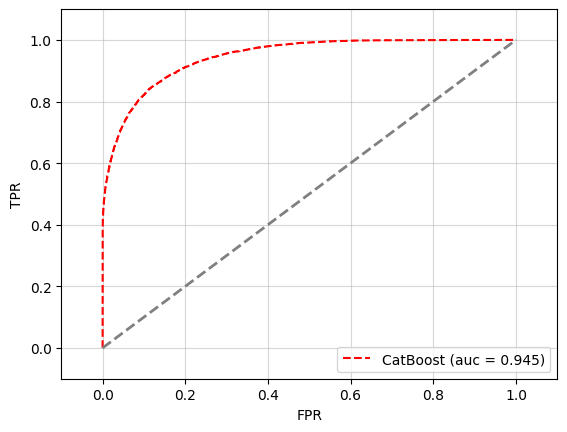

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
# 모델 학습
model.fit(x_train, y_train)

# 예측 확률 계산
y_pred_proba = model.predict_proba(x_test)[:, 1]

# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# AUC 점수 계산
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score}")
roc_auc = auc(x=fpr, y=tpr)
plt.plot(fpr, tpr, 'r--', label='%s (auc = %0.3f)'%('CatBoost', roc_auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()

# SVD 표준화 데이터 적용


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
# 모델 초기화 및 학습 (범주형 특징 인덱스를 직접 지정)


data1 = pd.read_csv('/content/drive/MyDrive/SVD_Standard.csv')

# feature와 label을 분리
x = data1.drop('is_canceled', axis=1)
y = data1['is_canceled']
model = CatBoostClassifier(task_type = 'GPU')

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

score = cross_validate(model, x, y,
                      scoring=scoring,
                      return_train_score=True,
                      cv=StratifiedKFold(shuffle=True))

print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
12:	learn: 0.5664254	total: 109ms	remaining: 8.27s
13:	learn: 0.5609196	total: 116ms	remaining: 8.2s
14:	learn: 0.5547685	total: 124ms	remaining: 8.14s
15:	learn: 0.5491694	total: 131ms	remaining: 8.06s
16:	learn: 0.5444866	total: 139ms	remaining: 8.01s
17:	learn: 0.5403093	total: 146ms	remaining: 7.97s
18:	learn: 0.5360731	total: 154ms	remaining: 7.93s
19:	learn: 0.5317150	total: 161ms	remaining: 7.89s
20:	learn: 0.5278570	total: 168ms	remaining: 7.85s
21:	learn: 0.5243843	total: 176ms	remaining: 7.82s
22:	learn: 0.5201487	total: 183ms	remaining: 7.78s
23:	learn: 0.5173938	total: 190ms	remaining: 7.73s
24:	learn: 0.5144937	total: 196ms	remaining: 7.64s
25:	learn: 0.5118904	total: 202ms	remaining: 7.56s
26:	learn: 0.5092293	total: 207ms	remaining: 7.47s
27:	learn: 0.5066517	total: 213ms	remaining: 7.41s
28:	learn: 0.5030550	total: 219ms	remaining: 7.35s
29:	learn: 0.5008863	total: 225ms	remaining: 7.28s
30:	learn: 0.4985226	total: 231ms	remaining: 7.

# SVD 정규화 데이터 적용


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
# 모델 초기화 및 학습 (범주형 특징 인덱스를 직접 지정)


data1 = pd.read_csv('/content/drive/MyDrive/SVD_Minmax.csv')

# feature와 label을 분리
x = data1.drop('is_canceled', axis=1)
y = data1['is_canceled']
model = CatBoostClassifier(task_type = 'GPU')

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

score = cross_validate(model, x, y,
                      scoring=scoring,
                      return_train_score=True,
                      cv=StratifiedKFold(shuffle=True))

print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
12:	learn: 0.5705984	total: 109ms	remaining: 8.24s
13:	learn: 0.5649161	total: 115ms	remaining: 8.13s
14:	learn: 0.5604522	total: 122ms	remaining: 8.03s
15:	learn: 0.5564383	total: 129ms	remaining: 7.95s
16:	learn: 0.5520087	total: 137ms	remaining: 7.89s
17:	learn: 0.5473807	total: 144ms	remaining: 7.84s
18:	learn: 0.5433970	total: 151ms	remaining: 7.81s
19:	learn: 0.5389482	total: 159ms	remaining: 7.77s
20:	learn: 0.5344187	total: 166ms	remaining: 7.73s
21:	learn: 0.5311755	total: 173ms	remaining: 7.68s
22:	learn: 0.5280853	total: 180ms	remaining: 7.64s
23:	learn: 0.5247694	total: 188ms	remaining: 7.64s
24:	learn: 0.5221717	total: 195ms	remaining: 7.62s
25:	learn: 0.5196894	total: 202ms	remaining: 7.58s
26:	learn: 0.5170955	total: 209ms	remaining: 7.54s
27:	learn: 0.5146451	total: 216ms	remaining: 7.5s
28:	learn: 0.5124109	total: 223ms	remaining: 7.46s
29:	learn: 0.5100421	total: 230ms	remaining: 7.43s
30:	learn: 0.5078718	total: 238ms	remaining: 7.

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.6 MB/s eta 0:00:00


# shap 시각화

Learning rate set to 0.02624
0:	learn: 0.6642393	total: 69.8ms	remaining: 1m 9s
1:	learn: 0.6398368	total: 133ms	remaining: 1m 6s
2:	learn: 0.6158277	total: 195ms	remaining: 1m 4s
3:	learn: 0.5927010	total: 258ms	remaining: 1m 4s
4:	learn: 0.5737816	total: 302ms	remaining: 1m
5:	learn: 0.5570642	total: 343ms	remaining: 56.9s
6:	learn: 0.5416672	total: 386ms	remaining: 54.7s
7:	learn: 0.5270068	total: 426ms	remaining: 52.9s
8:	learn: 0.5124522	total: 467ms	remaining: 51.4s
9:	learn: 0.4988662	total: 501ms	remaining: 49.6s
10:	learn: 0.4875444	total: 536ms	remaining: 48.2s
11:	learn: 0.4786196	total: 570ms	remaining: 46.9s
12:	learn: 0.4710264	total: 604ms	remaining: 45.9s
13:	learn: 0.4635425	total: 638ms	remaining: 44.9s
14:	learn: 0.4539905	total: 670ms	remaining: 44s
15:	learn: 0.4479546	total: 702ms	remaining: 43.2s
16:	learn: 0.4414605	total: 737ms	remaining: 42.6s
17:	learn: 0.4366858	total: 770ms	remaining: 42s
18:	learn: 0.4317363	total: 803ms	remaining: 41.5s
19:	learn: 0.42598

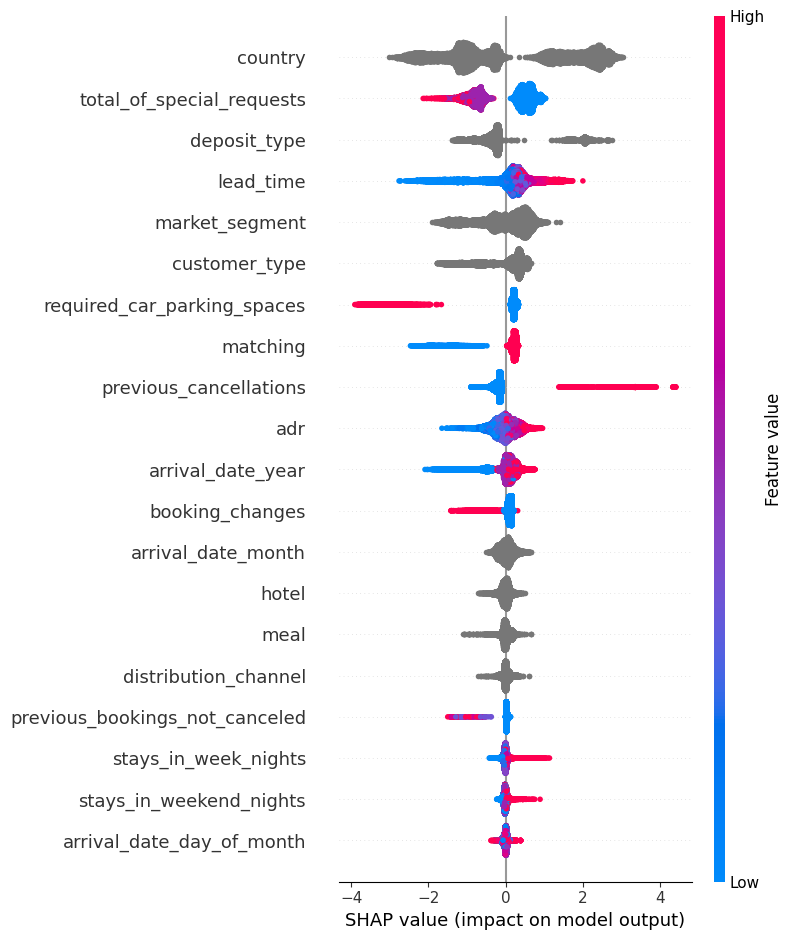

                           feature  importance
11                         country    1.469212
24       total_of_special_requests    0.666571
19                    deposit_type    0.578233
1                        lead_time    0.568999
12                  market_segment    0.506433
21                   customer_type    0.425540
23     required_car_parking_spaces    0.394478
25                        matching    0.384255
15          previous_cancellations    0.351878
22                             adr    0.232975
2                arrival_date_year    0.229845
18                 booking_changes    0.175673
3               arrival_date_month    0.127753
0                            hotel    0.085248
10                            meal    0.063225
13            distribution_channel    0.060572
16  previous_bookings_not_canceled    0.056780
6             stays_in_week_nights    0.048585
5          stays_in_weekend_nights    0.044526
4        arrival_date_day_of_month    0.040586
7            

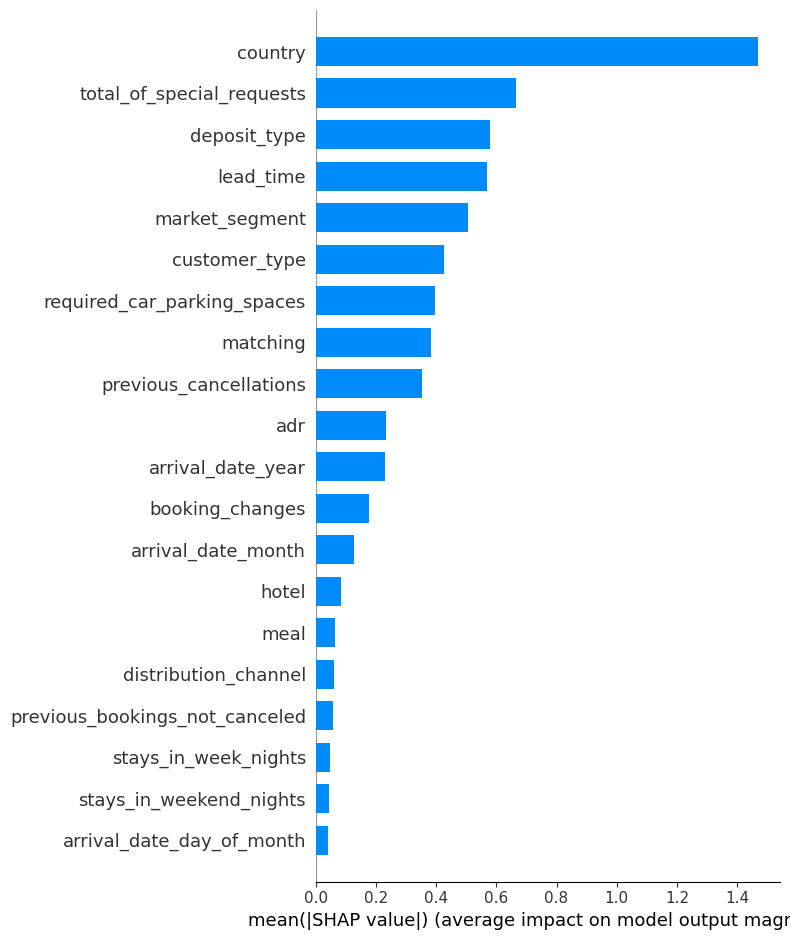

In [ ]:
# SHAP 값 계산
import shap
# 데이터 로드
data1 = pd.read_csv('/content/drive/MyDrive/hotel_cat.csv')

# feature와 label을 분리
x_cat = data1.drop('is_canceled', axis=1)
y = data1['is_canceled']
# trainset과 testset으로 나누기
X_train, X_test, y_train, y_test = train_test_split(x_cat, y, test_size=0.2, random_state=42)

categorical_features_indices = np.where(X_train.dtypes == 'object')[0]

# 모델 초기화 및 학습
model = CatBoostClassifier(depth=8, iterations=1000, cat_features=categorical_features_indices,task_type = 'GPU')
model.fit(X_train, y_train)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP 요약 플롯
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# 각 피처별 SHAP 값의 평균 절대값 계산
shap_values_mean_abs = np.abs(shap_values).mean(axis=0)
shap_importance = pd.DataFrame({
    'feature': X_test.columns,
    'importance': shap_values_mean_abs
}).sort_values(by='importance', ascending=False)

print(shap_importance)

# SHAP 바 플롯 (피처 중요도)
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar")

In [ ]:
X_test['previous_cancellations']

46946    0
71490    0
88840    0
47436    0
96599    0
        ..
74193    1
21926    0
96690    0
63509    0
76813    0
Name: previous_cancellations, Length: 23780, dtype: int64

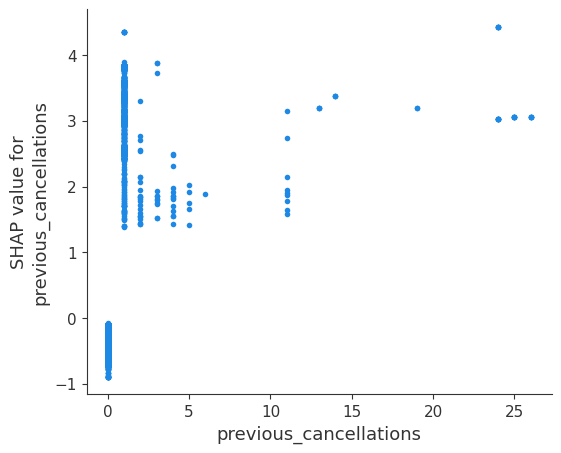

In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 데이터 로드
data1 = pd.read_csv('/content/drive/MyDrive/hotel_cat.csv')

# feature와 label을 분리
x_cat = data1.drop('is_canceled', axis=1)
y = data1['is_canceled']

# trainset과 testset으로 나누기
X_train, X_test, y_train, y_test = train_test_split(x_cat, y, test_size=0.2, random_state=42)

# 범주형 피처 인덱스 추출
categorical_features_indices = np.where(X_train.dtypes == 'object')[0]

# 모델 초기화 및 학습
model = CatBoostClassifier(depth=8, iterations=1000, cat_features=categorical_features_indices, task_type='GPU', verbose=0)
model.fit(X_train, y_train)

# SHAP 값 계산
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 부분 의존성 플롯과 유사한 플롯을 생성하기 위해 피처 값을 하나 선택하여 PDP를 생성
def plot_pdp(feature):
    shap.dependence_plot(feature, shap_values, X_test, interaction_index=None)

# 예시로 'previous_cancellations' 피처에 대한 PDP 플롯을 생성
plot_pdp('previous_cancellations')

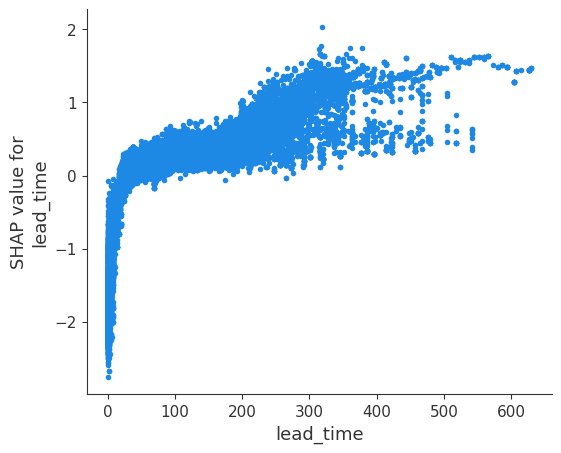

In [ ]:
plot_pdp('lead_time')

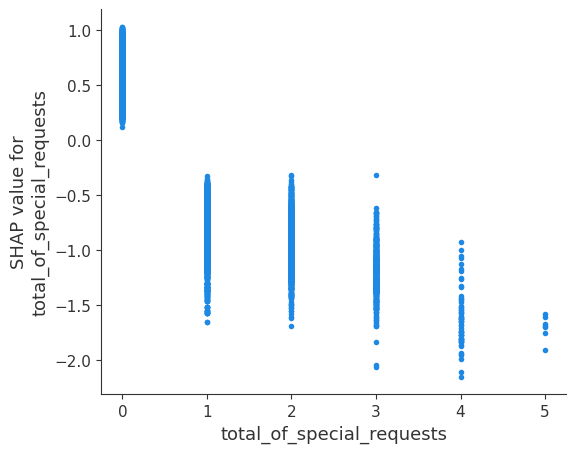

In [ ]:
plot_pdp('total_of_special_requests')

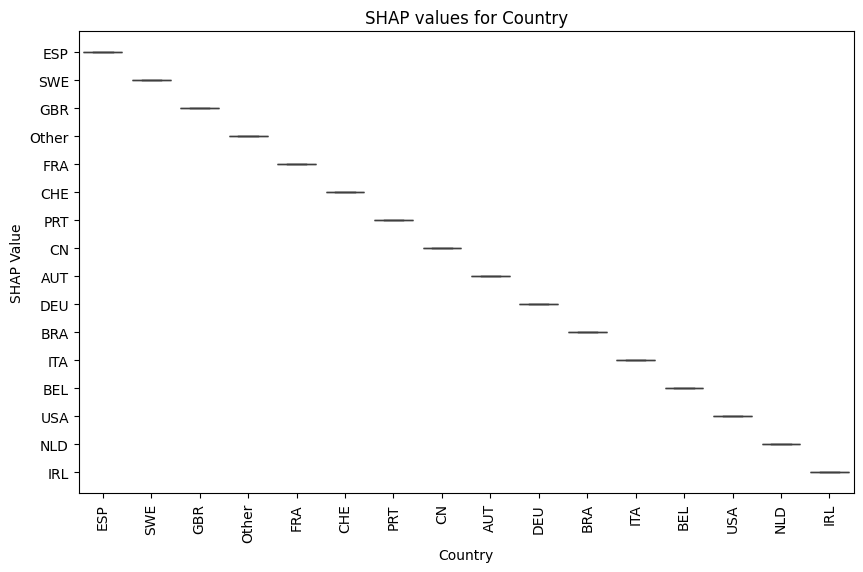

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# 특정 범주형 변수의 SHAP 값 분포 시각화
shap_values_df = pd.DataFrame(shap_values, columns=X_test.columns)
shap_values_df['country'] = X_test['country'].values

plt.figure(figsize=(10, 6))
sns.boxplot(x='country', y='country', data=shap_values_df)
plt.title('SHAP values for Country')
plt.xlabel('Country')
plt.ylabel('SHAP Value')
plt.xticks(rotation=90)
plt.show()

# SVD_Standard 그리드 서치

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 데이터 파일 로드
data = pd.read_csv('/content/drive/MyDrive/SVD_Standard.csv')

# feature와 label을 분리
x = data.drop('is_canceled', axis=1)
y = data['is_canceled']

# train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 모델 초기화
model = CatBoostClassifier( task_type ='GPU')

# 하이퍼파라미터 그리드 설정
param_grid = {
    'iterations': [100, 200, 500,1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8]
}

# 교차 검증 설정
cv = StratifiedKFold(n_splits=5)

# 그리드 서치 설정
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=cv, return_train_score=True)

# 그리드 서치 실행
grid_search.fit(x_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델로 테스트 데이터 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# 평가 지표 출력
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Precision:", precision_score(y_test, y_pred))
print("Test Recall:", recall_score(y_test, y_pred))
print("Test F1:", f1_score(y_test, y_pred))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
5:	learn: 0.4394179	total: 43.1ms	remaining: 7.14s
6:	learn: 0.4303625	total: 50ms	remaining: 7.1s
7:	learn: 0.4238002	total: 56.9ms	remaining: 7.06s
8:	learn: 0.4185963	total: 63.7ms	remaining: 7.02s
9:	learn: 0.4123462	total: 70.7ms	remaining: 6.99s
10:	learn: 0.4079446	total: 77.4ms	remaining: 6.96s
11:	learn: 0.4032489	total: 84.4ms	remaining: 6.95s
12:	learn: 0.3989034	total: 91.8ms	remaining: 6.97s
13:	learn: 0.3950885	total: 98.9ms	remaining: 6.96s
14:	learn: 0.3909789	total: 106ms	remaining: 6.93s
15:	learn: 0.3872408	total: 112ms	remaining: 6.91s
16:	learn: 0.3835612	total: 119ms	remaining: 6.88s
17:	learn: 0.3808626	total: 126ms	remaining: 6.86s
18:	learn: 0.3777434	total: 133ms	remaining: 6.85s
19:	learn: 0.3753114	total: 139ms	remaining: 6.83s
20:	learn: 0.3729043	total: 147ms	remaining: 6.85s
21:	learn: 0.3698548	total: 155ms	remaining: 6.87s
22:	learn: 0.3680639	total: 162ms	remaining: 6.89s
23:	learn: 0.3654135	total: 170ms	remaining: 

# end_hotel_bookings 그리드 서치

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 데이터 파일 로드
data = pd.read_csv('/content/drive/MyDrive/end_hotel_bookings.csv')

# feature와 label을 분리
x = data.drop('is_canceled', axis=1)
y = data['is_canceled']

# train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 모델 초기화
model = CatBoostClassifier( task_type ='GPU')

# 하이퍼파라미터 그리드 설정
param_grid = {
    'iterations': [100, 200, 500,1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8]
}

# 교차 검증 설정
cv = StratifiedKFold(n_splits=5)

# 그리드 서치 설정
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=cv, return_train_score=True)

# 그리드 서치 실행
grid_search.fit(x_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# # 최적의 모델로 테스트 데이터 평가
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(x_test)

# # 평가 지표 출력
# print("Test Accuracy:", accuracy_score(y_test, y_pred))
# print("Test Precision:", precision_score(y_test, y_pred))
# print("Test Recall:", recall_score(y_test, y_pred))
# print("Test F1:", f1_score(y_test, y_pred))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1:	learn: 0.4509675	total: 14.9ms	remaining: 7.43s
2:	learn: 0.4124318	total: 22.1ms	remaining: 7.34s
3:	learn: 0.3916875	total: 29ms	remaining: 7.23s
4:	learn: 0.3786374	total: 36.2ms	remaining: 7.21s
5:	learn: 0.3657944	total: 43.3ms	remaining: 7.18s
6:	learn: 0.3584658	total: 50.3ms	remaining: 7.14s
7:	learn: 0.3496062	total: 57.2ms	remaining: 7.09s
8:	learn: 0.3451218	total: 64.2ms	remaining: 7.07s
9:	learn: 0.3408013	total: 71.3ms	remaining: 7.06s
10:	learn: 0.3341082	total: 78.5ms	remaining: 7.06s
11:	learn: 0.3307481	total: 85.9ms	remaining: 7.07s
12:	learn: 0.3278988	total: 93.1ms	remaining: 7.07s
13:	learn: 0.3248730	total: 100ms	remaining: 7.06s
14:	learn: 0.3230380	total: 107ms	remaining: 7.05s
15:	learn: 0.3200165	total: 114ms	remaining: 7.04s
16:	learn: 0.3177393	total: 122ms	remaining: 7.04s
17:	learn: 0.3158978	total: 129ms	remaining: 7.05s
18:	learn: 0.3148678	total: 137ms	remaining: 7.05s
19:	learn: 0.3127039	total: 144ms	remaining: 

# hotel_cat 그리드 서치

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 데이터 파일 로드
data = pd.read_csv('/content/drive/MyDrive/hotel_cat.csv')

# feature와 label을 분리
x = data.drop('is_canceled', axis=1)
y = data['is_canceled']

# train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


categorical_features_indices = np.where(x_train.dtypes == 'object')[0]

# 모델 초기화 및 학습
model = CatBoostClassifier(cat_features=categorical_features_indices,task_type = 'GPU')

# 하이퍼파라미터 그리드 설정
param_grid = {
    'iterations': [100, 200, 500,1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8]
}

# 교차 검증 설정
cv = StratifiedKFold(n_splits=5)



# 그리드 서치 설정
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=cv, return_train_score=True)

# 그리드 서치 실행
grid_search.fit(x_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# # 최적의 모델로 테스트 데이터 평가
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(x_test)

# # 평가 지표 출력
# print("Test Accuracy:", accuracy_score(y_test, y_pred))
# print("Test Precision:", precision_score(y_test, y_pred))
# print("Test Recall:", recall_score(y_test, y_pred))
# print("Test F1:", f1_score(y_test, y_pred))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1:	learn: 0.4380442	total: 66.1ms	remaining: 33s
2:	learn: 0.4031139	total: 97.4ms	remaining: 32.4s
3:	learn: 0.3795170	total: 129ms	remaining: 32.2s
4:	learn: 0.3657054	total: 161ms	remaining: 32s
5:	learn: 0.3544369	total: 194ms	remaining: 32.1s
6:	learn: 0.3474849	total: 227ms	remaining: 32.2s
7:	learn: 0.3431203	total: 261ms	remaining: 32.4s
8:	learn: 0.3370735	total: 295ms	remaining: 32.5s
9:	learn: 0.3315211	total: 327ms	remaining: 32.4s
10:	learn: 0.3278765	total: 359ms	remaining: 32.3s
11:	learn: 0.3260690	total: 392ms	remaining: 32.2s
12:	learn: 0.3235268	total: 424ms	remaining: 32.2s
13:	learn: 0.3203773	total: 456ms	remaining: 32.1s
14:	learn: 0.3185705	total: 489ms	remaining: 32.1s
15:	learn: 0.3150001	total: 523ms	remaining: 32.2s
16:	learn: 0.3123029	total: 556ms	remaining: 32.1s
17:	learn: 0.3098654	total: 591ms	remaining: 32.2s
18:	learn: 0.3088074	total: 623ms	remaining: 32.2s
19:	learn: 0.3073941	total: 658ms	remaining: 32.2s
20:	le

# end hotel bookings데이터 최적모델 --> 과적합 생김


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 파일 로드
data = pd.read_csv('/content/drive/MyDrive/end_hotel_bookings.csv')

# feature와 label을 분리
X = data.drop('is_canceled', axis=1)
y = data['is_canceled']
# trainset과 testset으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
# 모델 초기화 및 학습 (범주형 특징 인덱스를 직접 지정)
model = CatBoostClassifier(task_type = 'GPU' , depth = 8, iterations= 1000 , learning_rate = 0.1)

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

score = cross_validate(model, X, y,
                      scoring=scoring,
                      return_train_score=True,
                      cv=StratifiedKFold(shuffle=True))

print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
8:	learn: 0.3866375	total: 125ms	remaining: 13.8s
9:	learn: 0.3814506	total: 139ms	remaining: 13.7s
10:	learn: 0.3727535	total: 150ms	remaining: 13.5s
11:	learn: 0.3685975	total: 161ms	remaining: 13.2s
12:	learn: 0.3643764	total: 172ms	remaining: 13.1s
13:	learn: 0.3581427	total: 183ms	remaining: 12.9s
14:	learn: 0.3543813	total: 194ms	remaining: 12.7s
15:	learn: 0.3522973	total: 205ms	remaining: 12.6s
16:	learn: 0.3498852	total: 216ms	remaining: 12.5s
17:	learn: 0.3466031	total: 227ms	remaining: 12.4s
18:	learn: 0.3448868	total: 238ms	remaining: 12.3s
19:	learn: 0.3433909	total: 249ms	remaining: 12.2s
20:	learn: 0.3410743	total: 261ms	remaining: 12.2s
21:	learn: 0.3384167	total: 272ms	remaining: 12.1s
22:	learn: 0.3365429	total: 283ms	remaining: 12s
23:	learn: 0.3346835	total: 294ms	remaining: 12s
24:	learn: 0.3323913	total: 306ms	remaining: 11.9s
25:	learn: 0.3306334	total: 317ms	remaining: 11.9s
26:	learn: 0.3294820	total: 328ms	remaining: 11.8s
2

# end_hotel_bookings 최적모델 --> 과적합 방지

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

# 데이터 파일 로드
data = pd.read_csv('/content/drive/MyDrive/end_hotel_bookings.csv')

# feature와 label을 분리
X = data.drop('is_canceled', axis=1)
y = data['is_canceled']
# trainset과 testset으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
# 모델 초기화 및 학습 (범주형 특징 인덱스를 직접 지정)
model = CatBoostClassifier(task_type = 'GPU' , depth = 6, iterations= 1000 , learning_rate = 0.1)

# 사용할 평가 지표들 정의
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

score = cross_validate(model, X, y,
                      scoring=scoring,
                      return_train_score=True,
                      cv=StratifiedKFold(shuffle=True))

print("Train Accuracy:", np.mean(score['train_accuracy']))
print("Test Accuracy:", np.mean(score['test_accuracy']))

print("Train Precision:", np.mean(score['train_precision']))
print("Test Precision:", np.mean(score['test_precision']))

print("Train Recall:", np.mean(score['train_recall']))
print("Test Recall:", np.mean(score['test_recall']))

print("Train F1:", np.mean(score['train_f1']))
print("Test F1:", np.mean(score['test_f1']))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
8:	learn: 0.4129711	total: 81.8ms	remaining: 9.01s
9:	learn: 0.4069184	total: 89.2ms	remaining: 8.83s
10:	learn: 0.4004281	total: 96.7ms	remaining: 8.7s
11:	learn: 0.3947357	total: 104ms	remaining: 8.56s
12:	learn: 0.3902224	total: 111ms	remaining: 8.46s
13:	learn: 0.3867091	total: 119ms	remaining: 8.36s
14:	learn: 0.3815353	total: 126ms	remaining: 8.27s
15:	learn: 0.3764874	total: 133ms	remaining: 8.19s
16:	learn: 0.3697766	total: 140ms	remaining: 8.12s
17:	learn: 0.3669139	total: 148ms	remaining: 8.07s
18:	learn: 0.3648377	total: 155ms	remaining: 8.02s
19:	learn: 0.3614792	total: 163ms	remaining: 7.97s
20:	learn: 0.3576973	total: 170ms	remaining: 7.92s
21:	learn: 0.3563761	total: 177ms	remaining: 7.87s
22:	learn: 0.3548615	total: 185ms	remaining: 7.85s
23:	learn: 0.3525772	total: 191ms	remaining: 7.79s
24:	learn: 0.3514160	total: 198ms	remaining: 7.72s
25:	learn: 0.3498039	total: 204ms	remaining: 7.65s
26:	learn: 0.3482294	total: 210ms	remaining: 7

# 최적모델 roc curve

0:	learn: 0.6220759	total: 7.94ms	remaining: 7.94s
1:	learn: 0.5535840	total: 15ms	remaining: 7.49s
2:	learn: 0.5193420	total: 22.3ms	remaining: 7.41s
3:	learn: 0.4946501	total: 29.7ms	remaining: 7.38s
4:	learn: 0.4658534	total: 37.2ms	remaining: 7.4s
5:	learn: 0.4495107	total: 44.8ms	remaining: 7.43s
6:	learn: 0.4354325	total: 52.1ms	remaining: 7.4s
7:	learn: 0.4232327	total: 59.2ms	remaining: 7.34s
8:	learn: 0.4142781	total: 66.4ms	remaining: 7.31s
9:	learn: 0.4067234	total: 73.5ms	remaining: 7.28s
10:	learn: 0.3993079	total: 81ms	remaining: 7.28s
11:	learn: 0.3940103	total: 88.2ms	remaining: 7.26s
12:	learn: 0.3858099	total: 95.1ms	remaining: 7.22s
13:	learn: 0.3824104	total: 102ms	remaining: 7.19s
14:	learn: 0.3793009	total: 109ms	remaining: 7.17s
15:	learn: 0.3764625	total: 116ms	remaining: 7.14s
16:	learn: 0.3731391	total: 123ms	remaining: 7.13s
17:	learn: 0.3708284	total: 130ms	remaining: 7.11s
18:	learn: 0.3668048	total: 137ms	remaining: 7.09s
19:	learn: 0.3626888	total: 144ms	

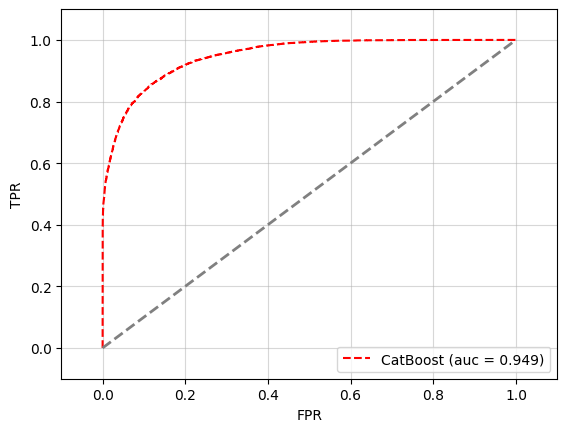

In [ ]:
from sklearn.metrics import roc_curve, auc
import pandas as pd
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
# 모델 학습
# 데이터 파일 로드
data = pd.read_csv('/content/drive/MyDrive/end_hotel_bookings.csv')

# feature와 label을 분리
X = data.drop('is_canceled', axis=1)
y = data['is_canceled']
# trainset과 testset으로 나누기
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습 (범주형 특징 인덱스를 직접 지정)
model = CatBoostClassifier(task_type = 'GPU' , depth = 6, iterations= 1000 , learning_rate = 0.1)
model.fit(x_train, y_train)

# 예측 확률 계산
y_pred_proba = model.predict_proba(x_test)[:, 1]

# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# AUC 점수 계산
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score}")
roc_auc = auc(x=fpr, y=tpr)
plt.plot(fpr, tpr, 'r--', label='%s (auc = %0.3f)'%('CatBoost', roc_auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()

# 최적모델 혼동행렬

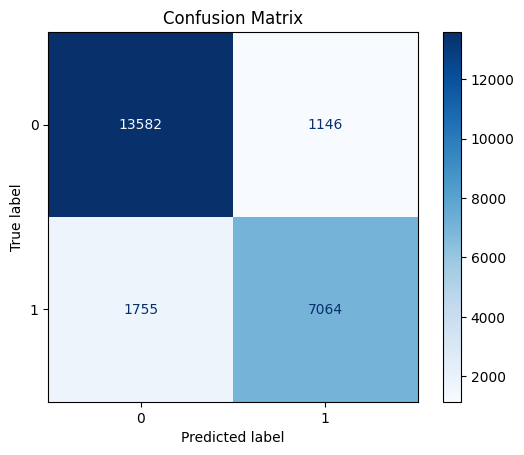

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 테스트 데이터에 대한 예측
y_pred = model.predict(x_test)

# 혼돈 행렬 계산
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# 혼돈 행렬 시각화
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()